<a href="https://colab.research.google.com/github/LoriGu5075/lorigu-assignment-1/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

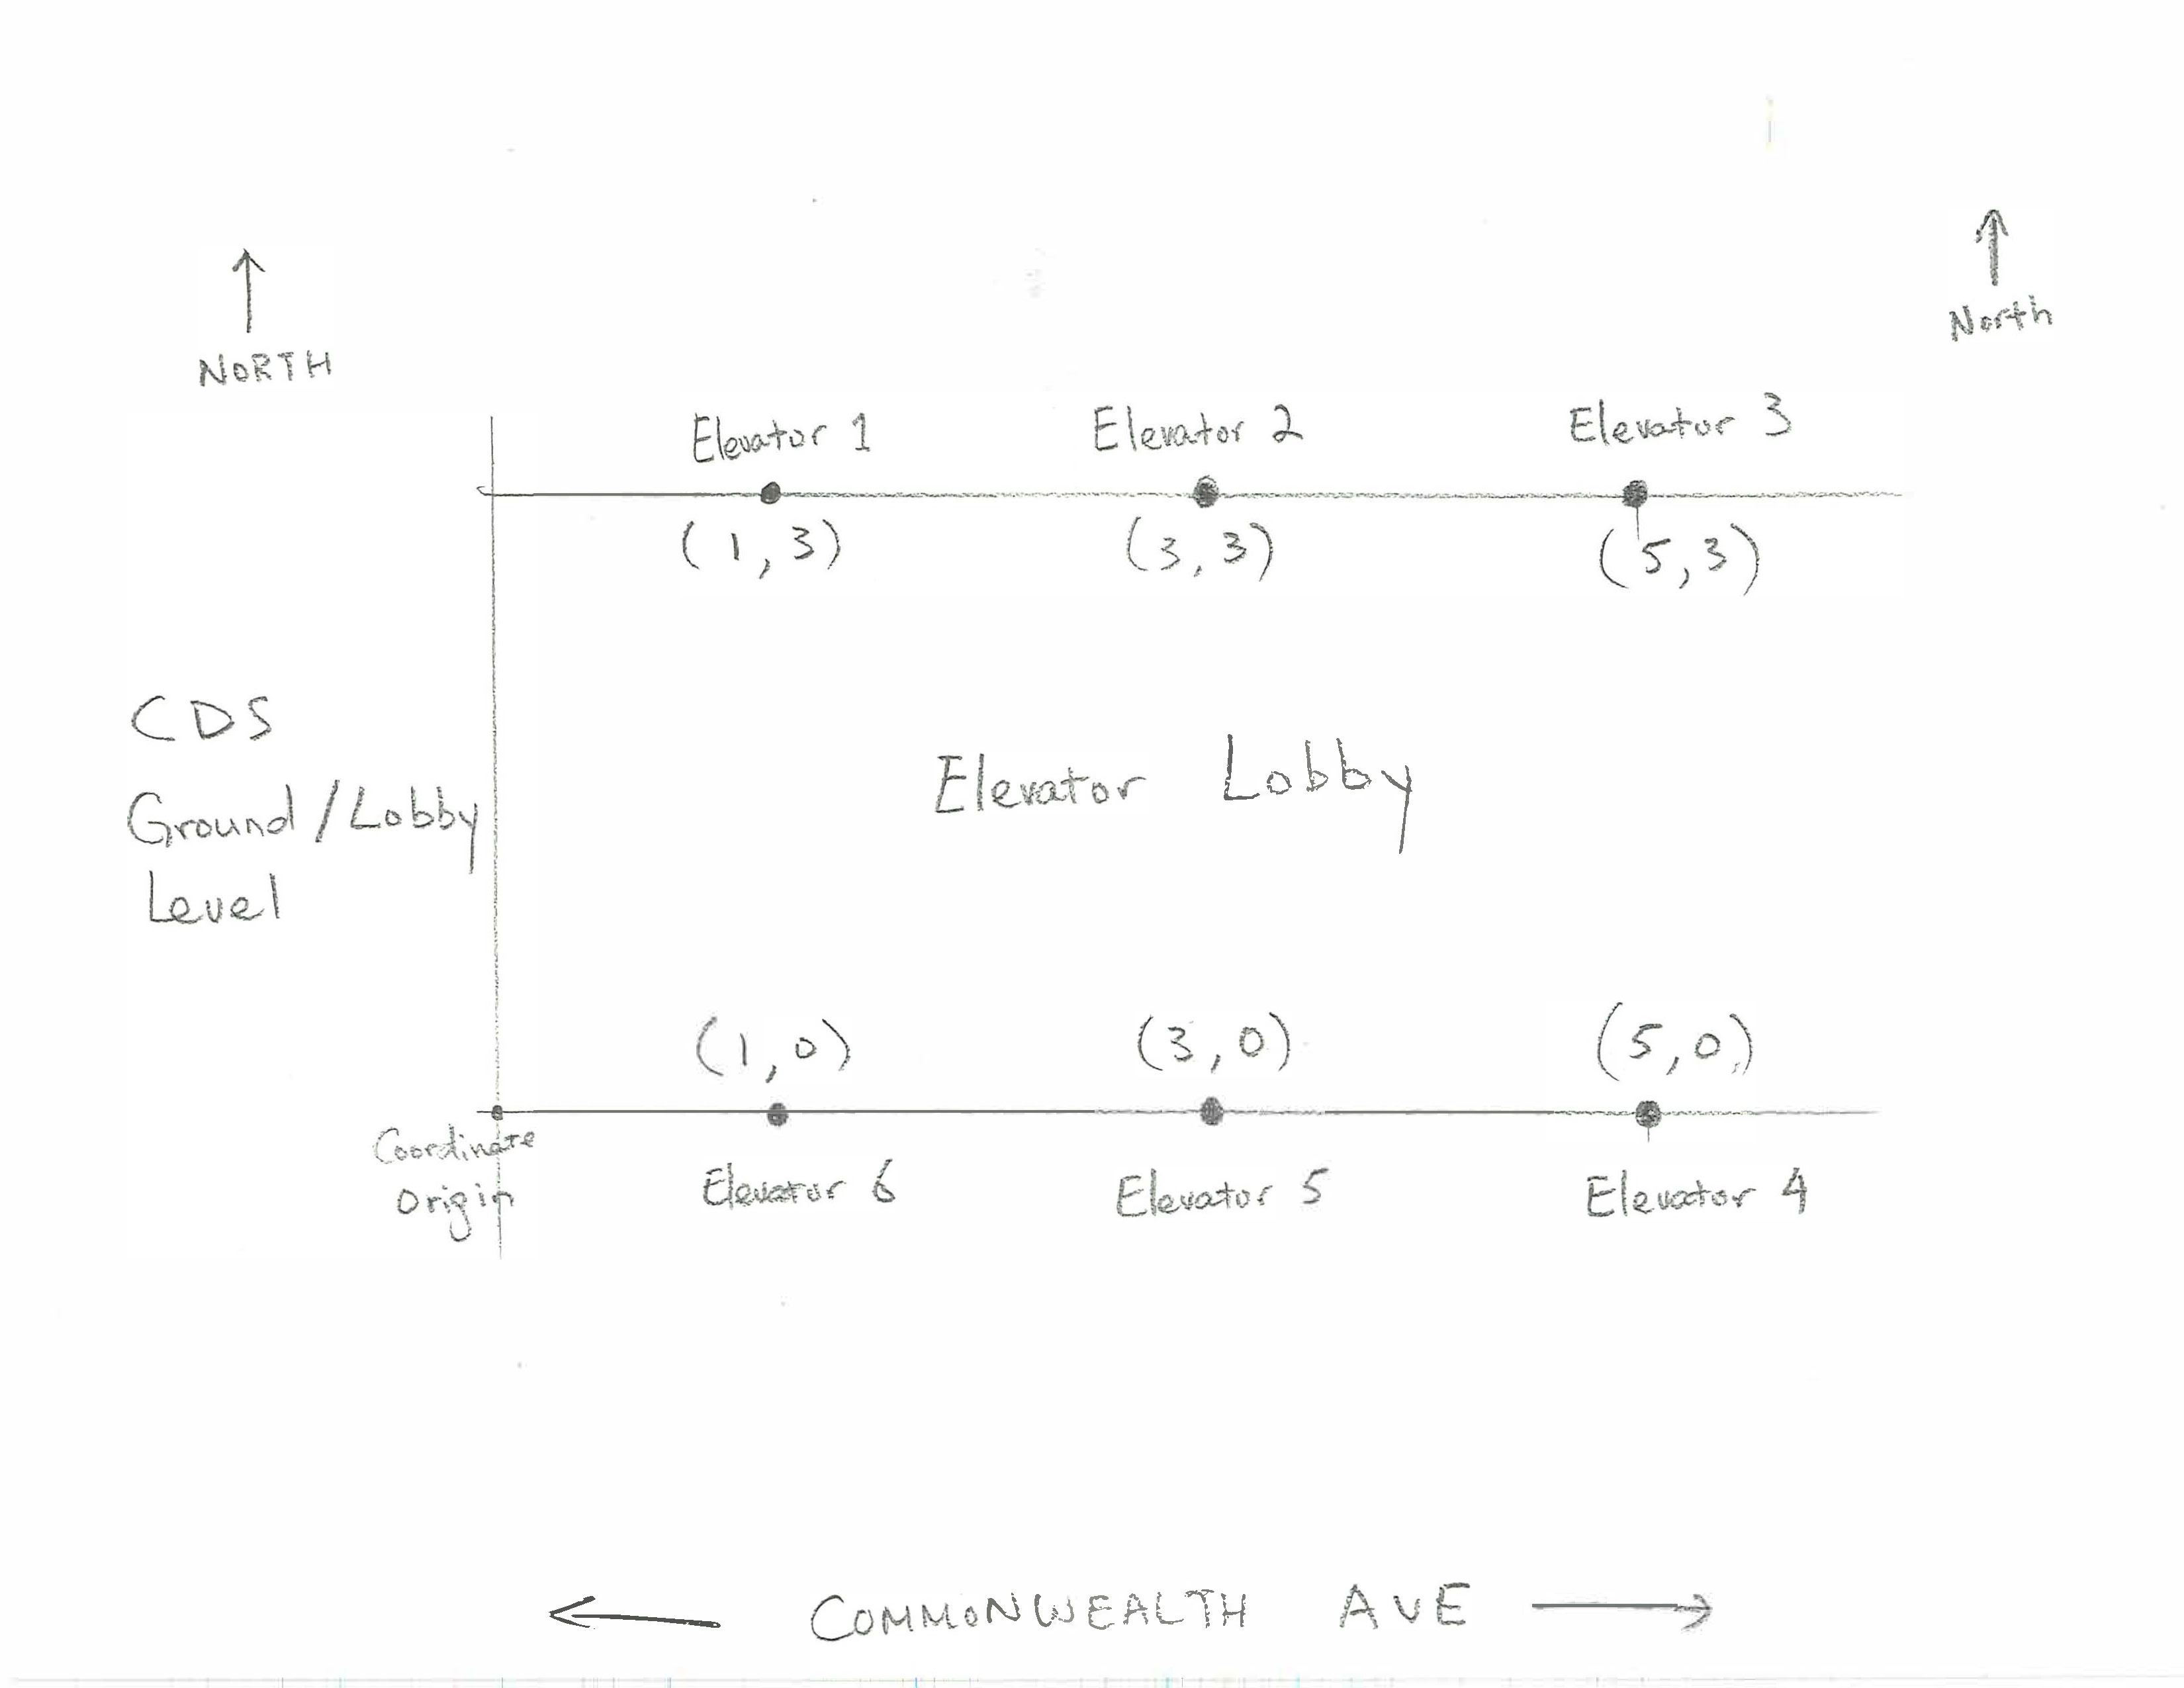

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** （3，1.5）

In [3]:
import pandas as pd

# Replace 'file_path.csv' with the path to your CSV file
df = pd.read_csv('dataset.csv')

# Display the first few rows of the DataFrame
print(df.head())

            Timestamp  Elevator ID    Email Address
0  9/16/2024 10:05:15            4    jonahg@bu.edu
1  9/16/2024 10:05:32            3    jarida@bu.edu
2  9/16/2024 10:15:23            5  beaudion@bu.edu
3  9/16/2024 10:16:23            4  beaudion@bu.edu
4  9/16/2024 10:16:47            5  beaudion@bu.edu


**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

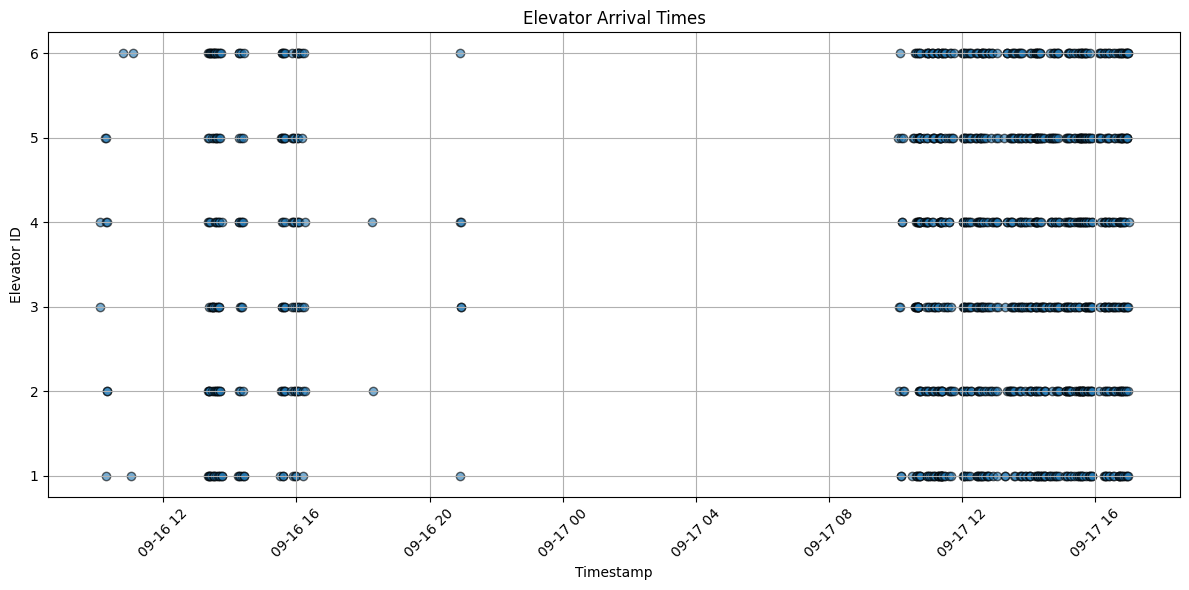

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

def make_plot():
    # Load the training data CSV file; replace 'training_data.csv' with your actual file path
    df = pd.read_csv('dataset1.csv')

    # Extract the necessary columns; assume columns are named 'timestamp' and 'elevator_id'
    timestamps = pd.to_datetime(df['Timestamp'])  # Convert to datetime if necessary
    elevator_ids = df['Elevator ID']

    # Create the scatter plot
    plt.figure(figsize=(12, 6))
    plt.scatter(timestamps, elevator_ids, alpha=0.6, edgecolors='k')
    plt.xlabel('Timestamp')
    plt.ylabel('Elevator ID')
    plt.title('Elevator Arrival Times')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

make_plot()


From this plot, we can see that elevator 5 and elevator 1 is most active, while elevator 6 is least active. Moreover, the graph shows cyclical patterns.

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [12]:
import pandas as pd

def calculate_frequency():
    # Reading the CSV file containing elevator data
    data = pd.read_csv('dataset1.csv')

    # Convert timestamp to a datetime format
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])

    # Identify gaps in data collection
    total_time = data['Timestamp'].max() - data['Timestamp'].min()
    total_seconds = total_time.total_seconds() - 46800 #13 hours that are not collecting data

    # Assuming we have some way to identify gaps (e.g., a column "data_collected" marking when data wasn't collected)
    # Adjust total_seconds for gaps (for simplicity, we will assume no gaps here)
    # total_seconds -= gaps_in_seconds  # If there were gaps, subtract them from the total time

    # Group by elevator_id and calculate the number of arrivals per elevator
    elevator_counts = data.groupby('Elevator ID').size()

    # Calculate the frequency (arrivals per second)
    elevator_frequencies = elevator_counts / total_seconds

    # Create a DataFrame to display the results
    frequency_table = pd.DataFrame({
        'Elevator ID': elevator_frequencies.index,
        'Arrivals per Second': elevator_frequencies.values
    })

    # Sort by the frequency in descending order (optional)
    frequency_table = frequency_table.sort_values(by='Arrivals per Second', ascending=False)

    # Display the table
    print(frequency_table)
    print(total_seconds)
    print(elevator_counts)
    return frequency_table


# Calculate and display the frequency table
frequency_table = calculate_frequency()

   Elevator ID  Arrivals per Second
2            3             0.002636
3            4             0.002605
4            5             0.002589
1            2             0.002512
5            6             0.002465
0            1             0.002403
64494.0
Elevator ID
1    155
2    162
3    170
4    168
5    167
6    159
dtype: int64


**Answer:** Base on the table, Elevator 3 has the highest frequency of arrivals. Therefore, it is better to wait near Elevator 3.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 64494 | 64494 | 64494 | 64494 | 64494 | 64494 |
| Number of arrivals | 155 | 162 | 170 | 168 | 167 |159 |
| Average frequency (arrivals per second) | 0.002403 | 0.002512 | 0.002636 | 0.002605 | 0.002589 |0.002465 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

The probability of each elevator being the next to arrive is directly proportional to its frequency of arrivals. Therefore, since Elevator 3 has highest Number of arrivals, the probability of being next elevator to arrive is also the highest. Which means that Elevator 3 is most likely to arrive next. But we have to know that the difference is small.

**Answer:** The probability is directly proportional to its frequency of arrivals.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 15.80%| 16.51% | 17.33 | 17.13% | 17.02% |16.21% |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


**Answer:** Use the formula for the weighted centroid
For optimal x value,  15.80% * 1 + 16.51% * 3 + 17.33% * 5 + 17.13% * 5 + 17.02% * 3 + 16.21% * 1 = 3.049
For optial y value, 15.80% * 3 + 16.51% * 3 + 17.33% * 3 + 17.02% * 0 + 17.02% * 0 + 16.21% * 0 = 1.4892

Therefore the best position should be **(3.049, 1.4892)**

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [16]:
import pandas as pd
import numpy as np

# Define the coordinates for each elevator ID
elevator_coordinates = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}

def euclidean_distance(coord1, coord2):
    # Calculate Euclidean distance between two points
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

def is_valid_elevator_id(elevator_id):
    # Check if the elevator ID is valid (i.e., a number and exists in the elevator_coordinates)
    return pd.api.types.is_numeric_dtype(type(elevator_id)) and elevator_id in elevator_coordinates

def get_average_walk_distance(data, coordinate):
    '''
    data: CSV file containing elevator arrival data with elevator IDs.
    coordinate: The coordinate where you're waiting.
    Returns: The average walk distance to the next elevator.
    '''
    # Read the CSV file
    df = pd.read_csv(data)
    total_distance = 0
    total_arrivals = len(df)
    valid_entry = 0
    # Iterate over each elevator arrival in the dataset
    for index, row in df.iterrows():
        # Get the elevator's ID
        elevator_id = row['Elevator ID']

        # Check if the elevator ID is valid
        if not is_valid_elevator_id(elevator_id):
            continue  # Skip invalid entries

        # Find the corresponding elevator's coordinates
        elevator_coord = elevator_coordinates[elevator_id]

        # Calculate the distance from the waiting location to the elevator
        distance = euclidean_distance(coordinate, elevator_coord)

        # Accumulate total distance
        total_distance += distance
        valid_entry += 1
    # Calculate and return the average distance
    average_walk_distance = total_distance / total_arrivals
    print(f"Number of arrivals calculated: {valid_entry}")
    return average_walk_distance

# Example usage with a sample CSV and coordinates
# Replace 'train.csv' with your actual data file and coordinates for waiting.
average_distance_q1 = get_average_walk_distance('dataset1.csv', (3,1.5))
average_distance_q5 = get_average_walk_distance('dataset1.csv', (3.0526,1.4928))

print(f"Average distance(Q1 location):{average_distance_q1}")
print(f"Average distance(Q5 location):{average_distance_q5}")

Number of arrivals calculated: 981
Number of arrivals calculated: 981
Average distance(Q1 location):2.1646279306829768
Average distance(Q5 location):2.16399954182277


**Answer:** TODO

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|2.163793103448276| 1044 |   1044 |
|2.163466274815924| 1044 |   1044 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** TODO

In [18]:
average_distance_q1 = get_average_walk_distance('dataset2.csv', (3, 1.5))  # Coordinates from Q1
average_distance_q5 = get_average_walk_distance('dataset2.csv', (3.0526, 1.4928))  # Coordinates from Q5 (weighted centroid)

print(f"Average distance (Q1 location): {average_distance_q1}")
print(f"Average distance (Q5 location): {average_distance_q5}")

Number of arrivals calculated: 1044
Number of arrivals calculated: 1044
Average distance (Q1 location): 2.163793103448276
Average distance (Q5 location): 2.163466274815924
